In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\DELL\Desktop\bharath's file\DS\csv\gas_turbines.csv")
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [3]:
dataset = df.values
dataset

array([[   6.8594, 1007.9   ,   96.799 , ...,   10.605 ,    3.1547,
          82.722 ],
       [   6.785 , 1008.4   ,   97.118 , ...,   10.598 ,    3.2363,
          82.776 ],
       [   6.8977, 1008.8   ,   95.939 , ...,   10.601 ,    3.2012,
          82.468 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 , ...,   10.483 ,    7.9632,
          90.912 ],
       [   7.006 , 1006.8   ,   99.008 , ...,   10.533 ,    6.2494,
          93.227 ],
       [   6.9279, 1007.2   ,   97.533 , ...,   10.583 ,    4.9816,
          92.498 ]])

In [4]:
X = df.drop('TEY', axis = 1)
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [5]:
Y = df['TEY']
Y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [6]:
from sklearn import preprocessing

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.18418215, 0.45604964, 0.95131413, ..., 0.1353398 , 0.07152212,
        0.59654817],
       [0.18201978, 0.4663909 , 0.95588067, ..., 0.13398756, 0.07337235,
        0.59713433],
       [0.18529531, 0.47466391, 0.93900309, ..., 0.13456709, 0.07257648,
        0.59379104],
       ...,
       [0.19596183, 0.4229576 , 0.98992213, ..., 0.11177221, 0.18055195,
        0.68544912],
       [0.18844295, 0.43329886, 0.98293633, ..., 0.12143106, 0.14169257,
        0.71057802],
       [0.18617304, 0.44157187, 0.96182146, ..., 0.1310899 , 0.11294597,
        0.70266486]])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.25)

In [10]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [11]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(11279, 10) (1880, 10) (1880, 10) (11279,) (1880,) (1880,)


In [12]:
from keras.models import Sequential
from keras.layers import Dense

In [15]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
    model.add(Dense(8, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = Sequential([Dense(12, activation='relu', 
                          input_shape=(10,)),    
                          Dense(8, activation='relu'),    
                          Dense(1, activation='sigmoid'),]) 


In [16]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
hist = model.fit(X_train, Y_train, 
                 batch_size=32, 
                 epochs=100, 
                 validation_data=(X_val, Y_val))

Epoch 1/100
353/353 [==============================] - 1s 2ms/step - loss: -6.5316 - accuracy: 0.0000e+00 - val_loss: -46.2776 - val_accuracy: 0.0000e+00
Epoch 2/100
353/353 [==============================] - 0s 1ms/step - loss: -311.4836 - accuracy: 0.0000e+00 - val_loss: -5983.4404 - val_accuracy: 0.0000e+00
Epoch 3/100
353/353 [==============================] - 0s 1ms/step - loss: -12569.2795 - accuracy: 0.0000e+00 - val_loss: -41595.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
353/353 [==============================] - 0s 1ms/step - loss: -57085.8894 - accuracy: 0.0000e+00 - val_loss: -113952.5938 - val_accuracy: 0.0000e+00
Epoch 5/100
353/353 [==============================] - 0s 1ms/step - loss: -139589.6696 - accuracy: 0.0000e+00 - val_loss: -227877.8750 - val_accuracy: 0.0000e+00
Epoch 6/100
353/353 [==============================] - 0s 1ms/step - loss: -265156.3123 - accuracy: 0.0000e+00 - val_loss: -386922.0625 - val_accuracy: 0.0000e+00
Epoch 7/100
353/353 [==================

353/353 [==============================] - 0s 1ms/step - loss: -82434650.3955 - accuracy: 0.0000e+00 - val_loss: -85807216.0000 - val_accuracy: 0.0000e+00
Epoch 51/100
353/353 [==============================] - 0s 1ms/step - loss: -86713315.6610 - accuracy: 0.0000e+00 - val_loss: -90274208.0000 - val_accuracy: 0.0000e+00
Epoch 52/100
353/353 [==============================] - 0s 1ms/step - loss: -91483365.2203 - accuracy: 0.0000e+00 - val_loss: -94885952.0000 - val_accuracy: 0.0000e+00
Epoch 53/100
353/353 [==============================] - 0s 1ms/step - loss: -96140893.4463 - accuracy: 0.0000e+00 - val_loss: -99643464.0000 - val_accuracy: 0.0000e+00
Epoch 54/100
353/353 [==============================] - 1s 1ms/step - loss: -101427322.0113 - accuracy: 0.0000e+00 - val_loss: -104547784.0000 - val_accuracy: 0.0000e+00
Epoch 55/100
353/353 [==============================] - 1s 1ms/step - loss: -105725643.3672 - accuracy: 0.0000e+00 - val_loss: -109606344.0000 - val_accuracy: 0.0000e+00
E

353/353 [==============================] - 0s 1ms/step - loss: -488969444.1582 - accuracy: 0.0000e+00 - val_loss: -499654752.0000 - val_accuracy: 0.0000e+00
Epoch 99/100
353/353 [==============================] - 0s 1ms/step - loss: -502734213.0621 - accuracy: 0.0000e+00 - val_loss: -513417376.0000 - val_accuracy: 0.0000e+00
Epoch 100/100
353/353 [==============================] - 0s 1ms/step - loss: -517024586.7571 - accuracy: 0.0000e+00 - val_loss: -527431680.0000 - val_accuracy: 0.0000e+00


In [18]:
model.evaluate(X_test, Y_test)[1]

59/59 [==============================] - 0s 965us/step - loss: -529797952.0000 - accuracy: 0.0000e+00


0.0

In [19]:
import matplotlib.pyplot as plt

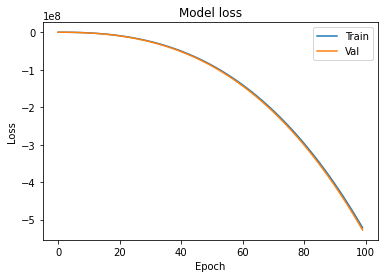

In [20]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

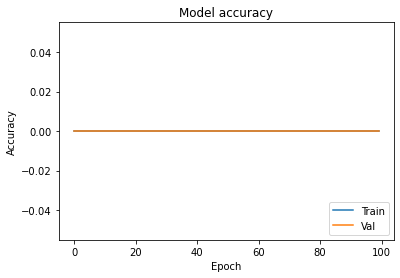

In [21]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [22]:
model_2 = Sequential([Dense(1000, activation='relu', 
                     input_shape=(10,)),
                     Dense(1000, activation='relu'),    
                     Dense(1000, activation='relu'),    
                     Dense(1000, activation='relu'),   
                     Dense(1, activation='sigmoid')])

In [23]:
model_2.compile(optimizer='adam',              
                loss='binary_crossentropy',              
                metrics=['accuracy'])

In [24]:
hist_2 = model_2.fit(X_train, Y_train,          
                     batch_size=32, 
                     epochs=100,          
                     validation_data=(X_val, Y_val))

Epoch 1/100
353/353 [==============================] - 14s 37ms/step - loss: -414876396777.5518 - accuracy: 0.0000e+00 - val_loss: -20361498329088.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
353/353 [==============================] - 13s 36ms/step - loss: -110457981833192.8594 - accuracy: 0.0000e+00 - val_loss: -948184696225792.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
353/353 [==============================] - 12s 35ms/step - loss: -1927275351901641.0000 - accuracy: 0.0000e+00 - val_loss: -7277267495419904.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
353/353 [==============================] - 13s 36ms/step - loss: -11177705171046840.0000 - accuracy: 0.0000e+00 - val_loss: -28492314825457664.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
353/353 [==============================] - 13s 37ms/step - loss: -38591574843600456.0000 - accuracy: 0.0000e+00 - val_loss: -78473673882730496.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
353/353 [==============================] - 12s 35ms/step - loss: -9

353/353 [==============================] - 12s 35ms/step - loss: -380871814216715468800.0000 - accuracy: 0.0000e+00 - val_loss: -407023195713374781440.0000 - val_accuracy: 0.0000e+00
Epoch 44/100
353/353 [==============================] - 12s 35ms/step - loss: -416356373901710917632.0000 - accuracy: 0.0000e+00 - val_loss: -445434361750845652992.0000 - val_accuracy: 0.0000e+00
Epoch 45/100
353/353 [==============================] - 13s 36ms/step - loss: -455684206833437048832.0000 - accuracy: 0.0000e+00 - val_loss: -486587058877106225152.0000 - val_accuracy: 0.0000e+00
Epoch 46/100
353/353 [==============================] - 12s 35ms/step - loss: -498020925765677154304.0000 - accuracy: 0.0000e+00 - val_loss: -530547363342939324416.0000 - val_accuracy: 0.0000e+00
Epoch 47/100
353/353 [==============================] - 14s 39ms/step - loss: -542713043106182266880.0000 - accuracy: 0.0000e+00 - val_loss: -577511779866461077504.0000 - val_accuracy: 0.0000e+00
Epoch 48/100
353/353 [===========

353/353 [==============================] - 12s 35ms/step - loss: -5809798472077745848320.0000 - accuracy: 0.0000e+00 - val_loss: -6034801545628281208832.0000 - val_accuracy: 0.0000e+00
Epoch 85/100
353/353 [==============================] - 12s 34ms/step - loss: -6114882567974805307392.0000 - accuracy: 0.0000e+00 - val_loss: -6338152194578935971840.0000 - val_accuracy: 0.0000e+00
Epoch 86/100
353/353 [==============================] - 12s 34ms/step - loss: -6427133519299215360000.0000 - accuracy: 0.0000e+00 - val_loss: -6653004474027941560320.0000 - val_accuracy: 0.0000e+00
Epoch 87/100
353/353 [==============================] - 13s 36ms/step - loss: -6770372806180401577984.0000 - accuracy: 0.0000e+00 - val_loss: -6980124558861904379904.0000 - val_accuracy: 0.0000e+00
Epoch 88/100
353/353 [==============================] - 12s 35ms/step - loss: -7093044447760396320768.0000 - accuracy: 0.0000e+00 - val_loss: -7319555233277284450304.0000 - val_accuracy: 0.0000e+00
Epoch 89/100
353/353 [=

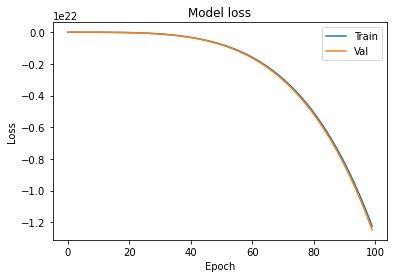

In [25]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

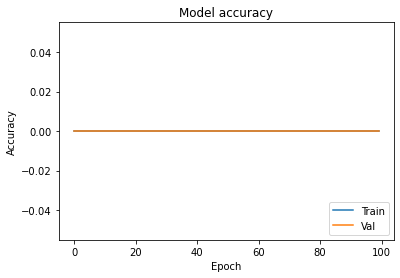

In [26]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [27]:
from keras.layers import Dropout
from keras import regularizers

In [28]:
model_3 = Sequential([Dense(1000, activation='relu', 
                      kernel_regularizer=regularizers.l2(0.01), 
                      input_shape=(10,)),    
                      Dropout(0.3),    
                      Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),    
                      Dropout(0.3),    
                      Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),    
                      Dropout(0.3),    
                      Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),    
                      Dropout(0.3),    
                      Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),])

In [29]:
model_3.compile(optimizer='adam',              
                loss='binary_crossentropy',              
                metrics=['accuracy'])

In [30]:
hist_3 = model_3.fit(X_train, Y_train,          
                     batch_size=32, 
                     epochs=100,          
                     validation_data=(X_val, Y_val))

Epoch 1/100
353/353 [==============================] - 19s 50ms/step - loss: -1637296289451.5801 - accuracy: 0.0000e+00 - val_loss: -83260994486272.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
353/353 [==============================] - 18s 51ms/step - loss: -473093585491840.7500 - accuracy: 0.0000e+00 - val_loss: -4238858380115968.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
353/353 [==============================] - 31s 88ms/step - loss: -8858843620466549.0000 - accuracy: 0.0000e+00 - val_loss: -34743485105963008.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
353/353 [==============================] - 21s 59ms/step - loss: -54521863694640264.0000 - accuracy: 0.0000e+00 - val_loss: -142689980488089600.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
353/353 [==============================] - 23s 65ms/step - loss: -194969023538080992.0000 - accuracy: 0.0000e+00 - val_loss: -406390080425426944.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
353/353 [==============================] - 25s 71ms/step - lo

353/353 [==============================] - 21s 58ms/step - loss: -2237433048603832352768.0000 - accuracy: 0.0000e+00 - val_loss: -2391833614598799360000.0000 - val_accuracy: 0.0000e+00
Epoch 44/100
353/353 [==============================] - 20s 58ms/step - loss: -2449629834068095926272.0000 - accuracy: 0.0000e+00 - val_loss: -2619649046174266032128.0000 - val_accuracy: 0.0000e+00
Epoch 45/100
353/353 [==============================] - 20s 58ms/step - loss: -2680353843185850515456.0000 - accuracy: 0.0000e+00 - val_loss: -2863795937373461676032.0000 - val_accuracy: 0.0000e+00
Epoch 46/100
353/353 [==============================] - 20s 58ms/step - loss: -2932788758713274990592.0000 - accuracy: 0.0000e+00 - val_loss: -3125245376866038054912.0000 - val_accuracy: 0.0000e+00
Epoch 47/100
353/353 [==============================] - 21s 58ms/step - loss: -3213961821706326638592.0000 - accuracy: 0.0000e+00 - val_loss: -3404512745334352379904.0000 - val_accuracy: 0.0000e+00
Epoch 48/100
353/353 [=

353/353 [==============================] - 22s 61ms/step - loss: -35243904637980830072832.0000 - accuracy: 0.0000e+00 - val_loss: -36512864173112072077312.0000 - val_accuracy: 0.0000e+00
Epoch 85/100
353/353 [==============================] - 22s 62ms/step - loss: -37025919503222699982848.0000 - accuracy: 0.0000e+00 - val_loss: -38375032813235547930624.0000 - val_accuracy: 0.0000e+00
Epoch 86/100
353/353 [==============================] - 22s 61ms/step - loss: -38935787974272357498880.0000 - accuracy: 0.0000e+00 - val_loss: -40312747085308350169088.0000 - val_accuracy: 0.0000e+00
Epoch 87/100
353/353 [==============================] - 22s 61ms/step - loss: -40898769323115564498944.0000 - accuracy: 0.0000e+00 - val_loss: -42325067988808172044288.0000 - val_accuracy: 0.0000e+00
Epoch 88/100
353/353 [==============================] - 22s 62ms/step - loss: -43100892969877140144128.0000 - accuracy: 0.0000e+00 - val_loss: -44416962994124003213312.0000 - val_accuracy: 0.0000e+00
Epoch 89/100


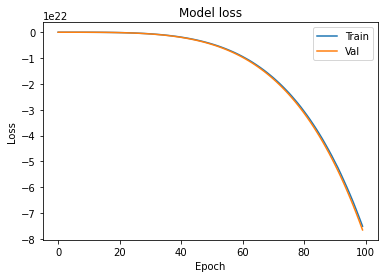

In [31]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

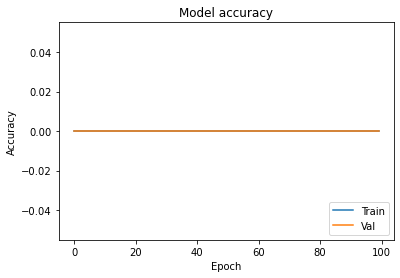

In [32]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [34]:
pred_y = model_3.predict(X)

In [35]:
pred_y

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)